[8, 12, 18, 27, 41, 62, 93, 140, 210, 315, 473]
[0.2442624568939209, 0.25238823890686035, 0.24572420120239258, 0.2635471820831299, 0.2689087390899658, 0.31762146949768066, 0.28235578536987305, 0.34362339973449707, 0.418398380279541, 0.7577545642852783, 0.9255285263061523]
[0.002107858657836914, 0.0031681060791015625, 0.00624847412109375, 0.00887441635131836, 0.023962020874023438, 0.1641843318939209, 0.2568700313568115, 0.9652762413024902, 3.535442590713501, 15.270036935806274, 55.39441704750061]


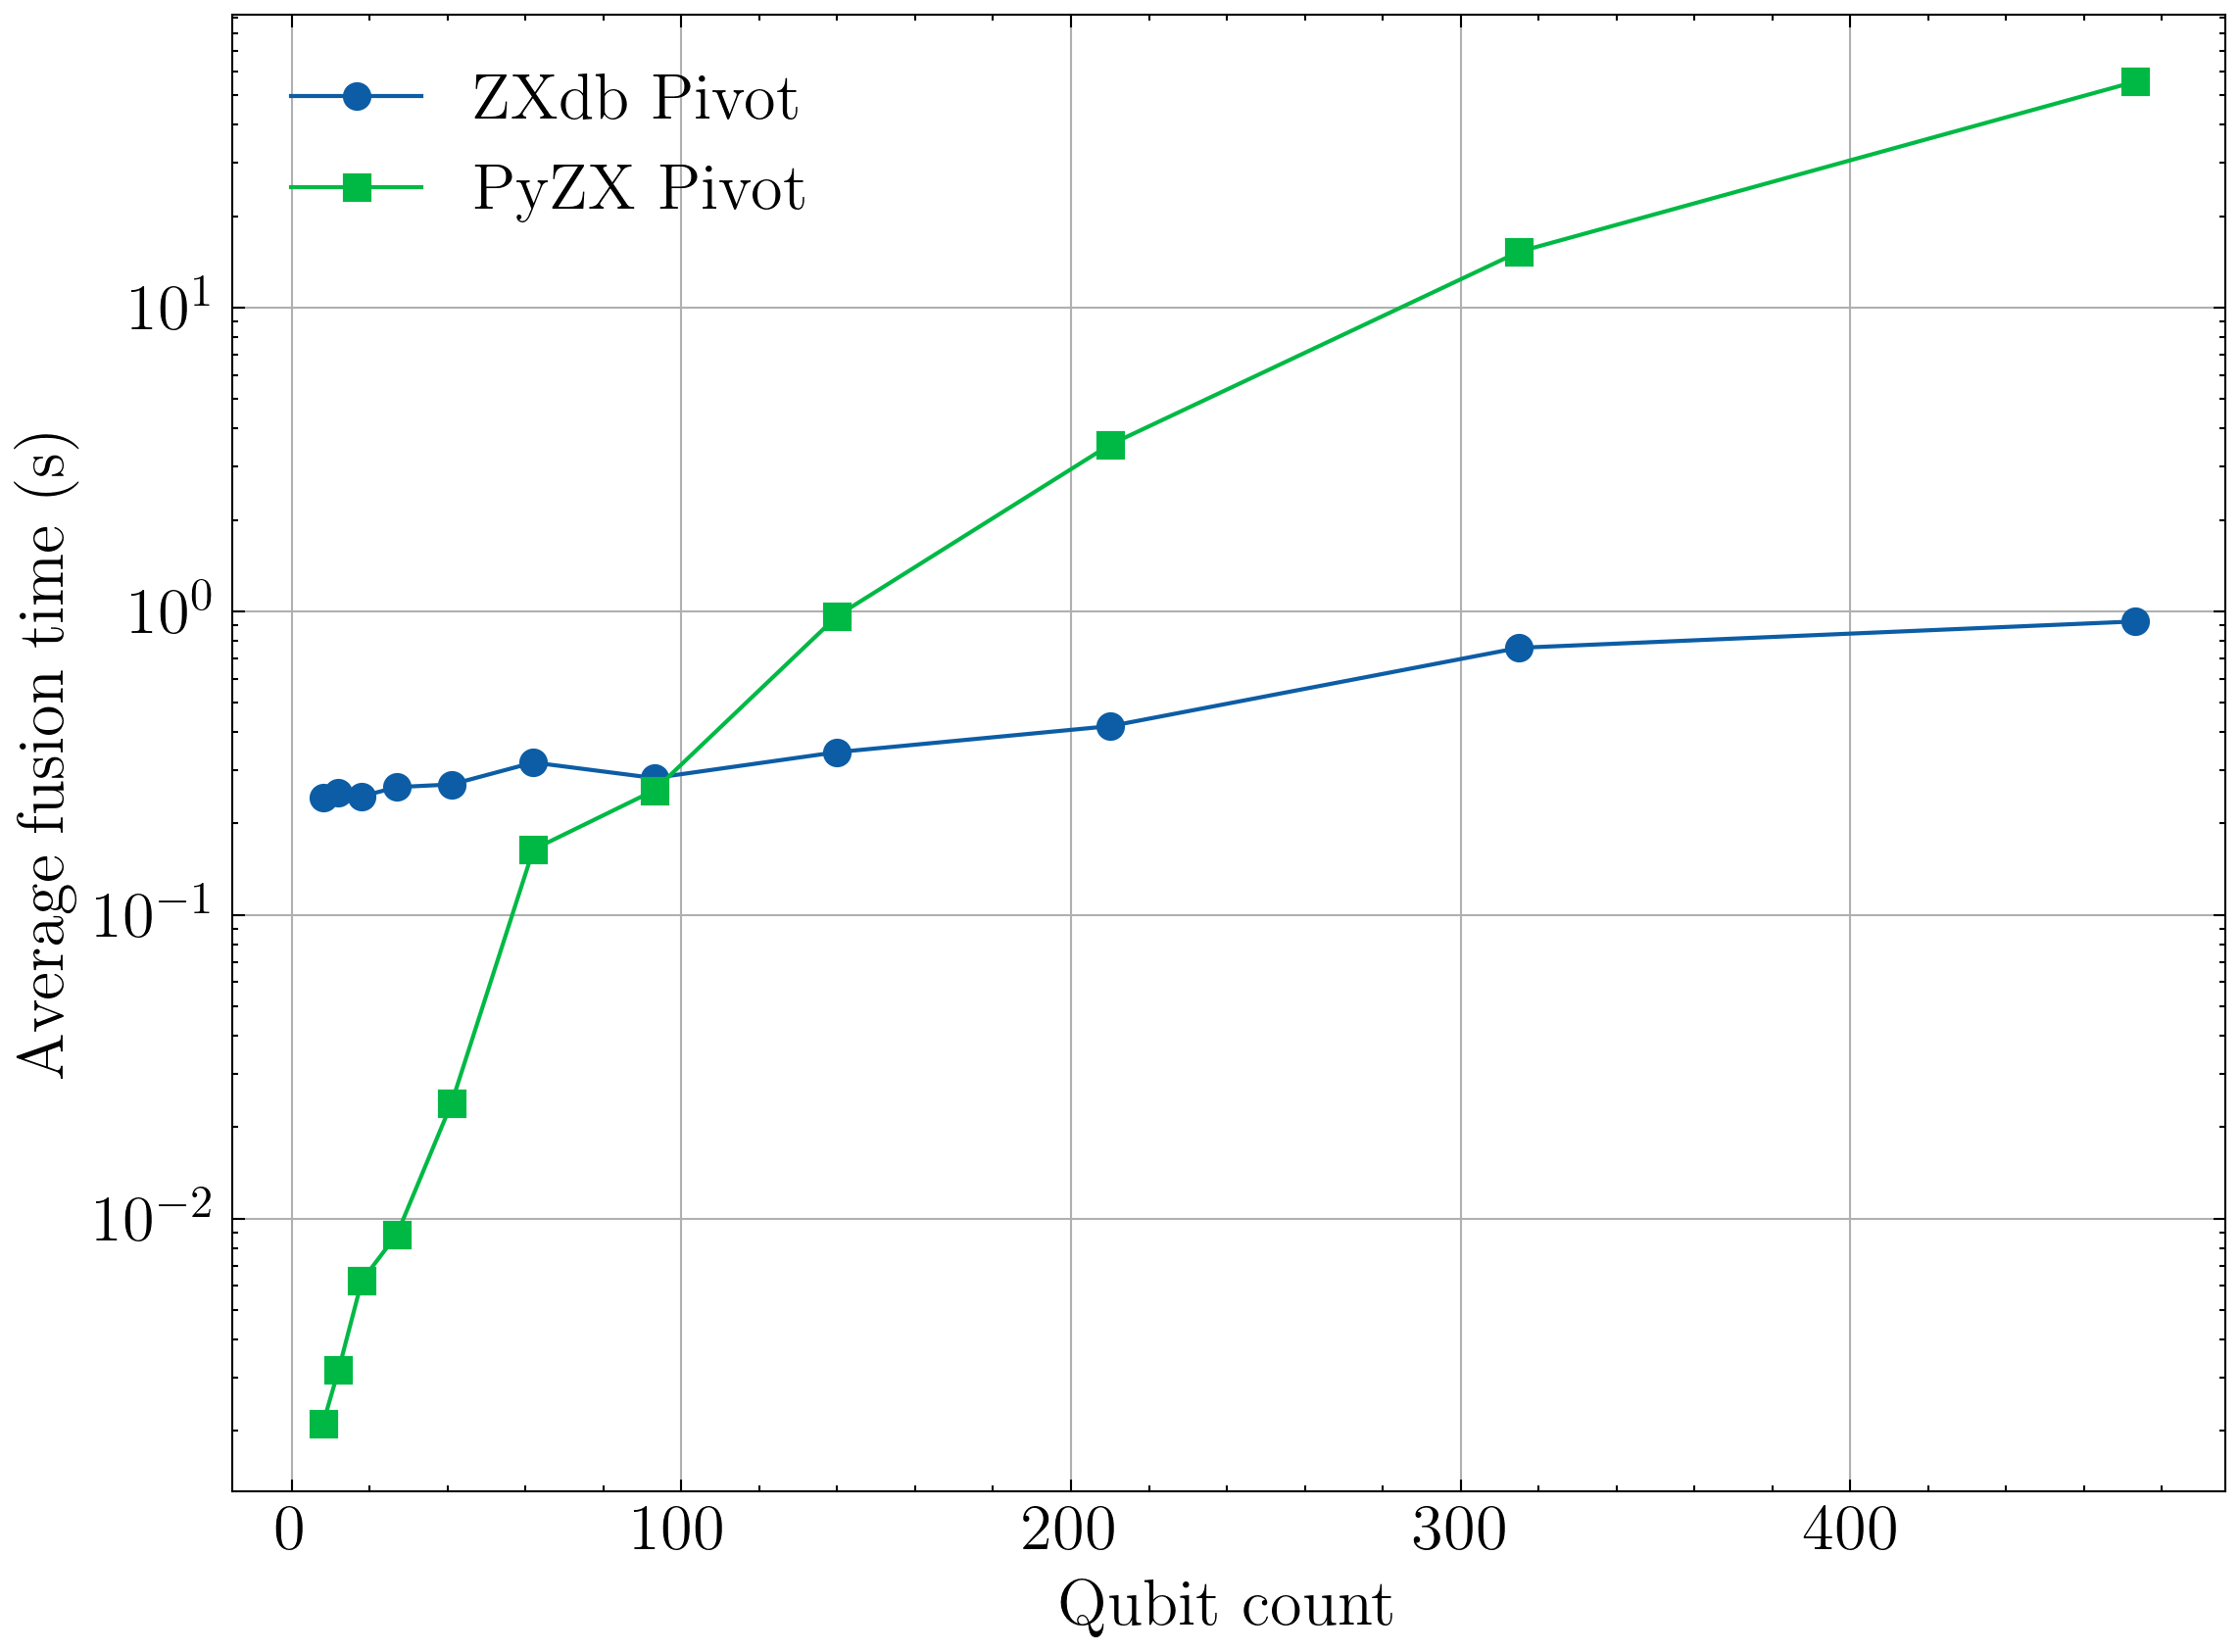

In [4]:
import os
import json
import matplotlib.pyplot as plt
import scienceplots
from collections import defaultdict

plt.style.use('science')
plt.rcParams.update({
    "font.size": 16,
    "axes.labelsize": 16,
    "axes.titlesize": 16,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "figure.dpi": 300,
})

# Path to your experiment folder
rule = "pivot"
name_in_legend = "Pivot"
folder = rule

# Collect results
results = defaultdict(lambda: {'db': [], 'pyzx': []})

for fname in os.listdir(folder):
    if fname.endswith('.json'):
        with open(os.path.join(folder, fname), 'r') as f:
            data = json.load(f)
            qubits = data.get('qubits')
            db_time = data.get(f'db_{rule}_rule_time')
            pyzx_time = data.get(f'pyzx_{rule}_rule_time')
            if qubits is not None and db_time is not None and pyzx_time is not None:
                results[qubits]['db'].append(db_time)
                results[qubits]['pyzx'].append(pyzx_time)

# Prepare data for plotting
qubit_counts = sorted(results.keys())
db_times = [sum(results[q]['db'])/len(results[q]['db']) for q in qubit_counts]
pyzx_times = [sum(results[q]['pyzx'])/len(results[q]['pyzx']) for q in qubit_counts]

print(qubit_counts)
print(db_times)
print(pyzx_times)

# Plot
plt.figure(figsize=(8,6))
plt.plot(qubit_counts, db_times, 'o-', label=f'ZXdb {name_in_legend}')
plt.plot(qubit_counts, pyzx_times, 's-', label=f'PyZX {name_in_legend}')
plt.xlabel('Qubit count')
plt.ylabel('Average fusion time (s)')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()